In [1]:
import pandas

import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn import model_selection

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression


from sklearn.linear_model import LogisticRegression

from sklearn. tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

In [2]:
data=pandas.read_csv("diabetes.csv")

In [3]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [8]:
X=data['BloodPressure'].values
Y=data['SkinThickness'].values

In [9]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

m=len(X)

numr=0
denm=0

for i in range(m):
    numr+=(X[i]-mean_x)*(Y[i]-mean_y)
    denm+=(X[i]-mean_x)**2
M=numr/denm
C=mean_y-(M*mean_x)

print(M,C)

0.17090581222360918 8.72593206752134


In [12]:
plt.show()

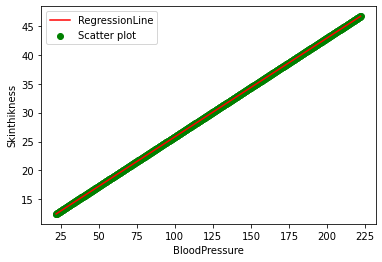

In [19]:
max_x=np.max(X)+100
min_x=np.max(X)-100

x=np.linspace(min_x,max_x,1000)
y=M*x+C


plt.plot(x,y,color='red',label='RegressionLine')
plt.scatter(x,y,c='green',label='Scatter plot')
plt.xlabel('BloodPressure')
plt.ylabel('Skinthikness')
plt.legend()
plt.show()


In [41]:
ss_t=0
ss_r=0
for i in range(m):
    y_pred=M*X[i]+C
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_t/ss_r)
print(r2)

[-0.04493485]


In [37]:

from sklearn.model_selection import train_test_split

x = data['BloodPressure']
y = data['SkinThickness']

x_matrix=x.values.reshape(-1,1)
reg=LinearRegression()
reg.fit(x_matrix,y)





LinearRegression()

In [32]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
reg.score(x_matrix,y)

0.04300254019757954

In [44]:
reg.coef_


array([0.17090581])

In [43]:
reg.intercept_

8.725932067521335

In [51]:
new_data=pandas.DataFrame(data=[170,260],columns=['BloodPressure'])
new_data

,BloodPressure
0,170
1,260


In [52]:
reg.predict(new_data)

array([37.77992015, 53.16144325])

In [59]:
new_data['predicted_SkinThickness'] = reg.predict(new_data)
new_data

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

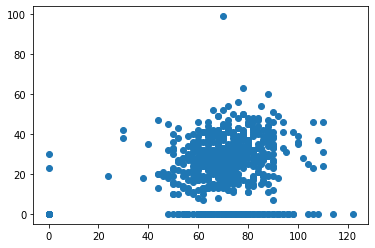

In [61]:
plt.scatter(X,y)